# Avocado Project

In [1]:
from IPython.display import Image
Image(url= "https://i.pinimg.com/originals/7b/aa/c0/7baac0f96157a71b6d5e9550b2cffdf0.jpg")

## Introduction

### Avocado is a fruit consumed by people heavily in the United States.Avocados are a good source of B vitamins, which help you fight off disease and infection. They also give you vitamins C and E, plus natural plant chemicals that may help prevent cancer. Avocados are low in sugar. And they contain fiber, which helps you feel full longer.

### Some relevant columns in the dataset:

### Date - The date of the observation
### AveragePrice - the average price of a single avocado
### type - conventional or organic
### year - the year
### Region - the city or region of the observation
### Total Volume - Total number of avocados sold
### 4046 - Total number of avocados with PLU 4046 sold
### 4225 - Total number of avocados with PLU 4225 sold
### 4770 - Total number of avocados with PLU 4770 sold

### Aim for this project is just to predict the price of avacado.

## Libraries

In [19]:
# importing necessaries libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# preprocession, normalizing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

from sklearn.model_selection import train_test_split,RandomizedSearchCV

# models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, LassoCV 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve,auc



import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
# I have import important libraries for this project in one go so that it will save time.

## Dataset

In [20]:
import pandas as pd
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# From the dataset i can say that there are few columns in integer and few are in strings.
#Surely few columns need to drop as it is of no use. I will do it soon.

## EDA - Exploratory Data Analysis

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.drop('Date',axis=1,inplace=True)

In [4]:
# I am dropping Unnamed:0 and date columns as it is of no use.

In [6]:
df.shape

(18249, 12)

In [5]:
# There are 18249 rows and 12 columns in the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [6]:
# It is a mixed dataset as 9 columns are float type, 2 columns are integers type and 1 columns are object type.
# There is no missing values in any columns as count is 18249 for every columns.

In [9]:
#checking the value counts of each type
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [7]:
# There are 2 types avacodo in this dataset one is conventional and another is organic.

In [10]:
#co relation of total volume to total bag
df[['Total Volume','Total Bags']].corr()

,Total Volume,Total Bags
Total Volume,1.000000,0.963047
Total Bags,0.963047,1.000000


In [14]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [8]:
# Total number of counts in each columns is matching as there is no missing values.
# The difference betwwen the mean and 50% is not much.
# There are outlires in the dataset which i will remove it soon.

In [16]:
# removing the duplicates

df.drop_duplicates(inplace = True)
df.shape

(18249, 12)

In [9]:
# There are no duplicates in the dataset.

### Data Visualization:

## Pair Plot

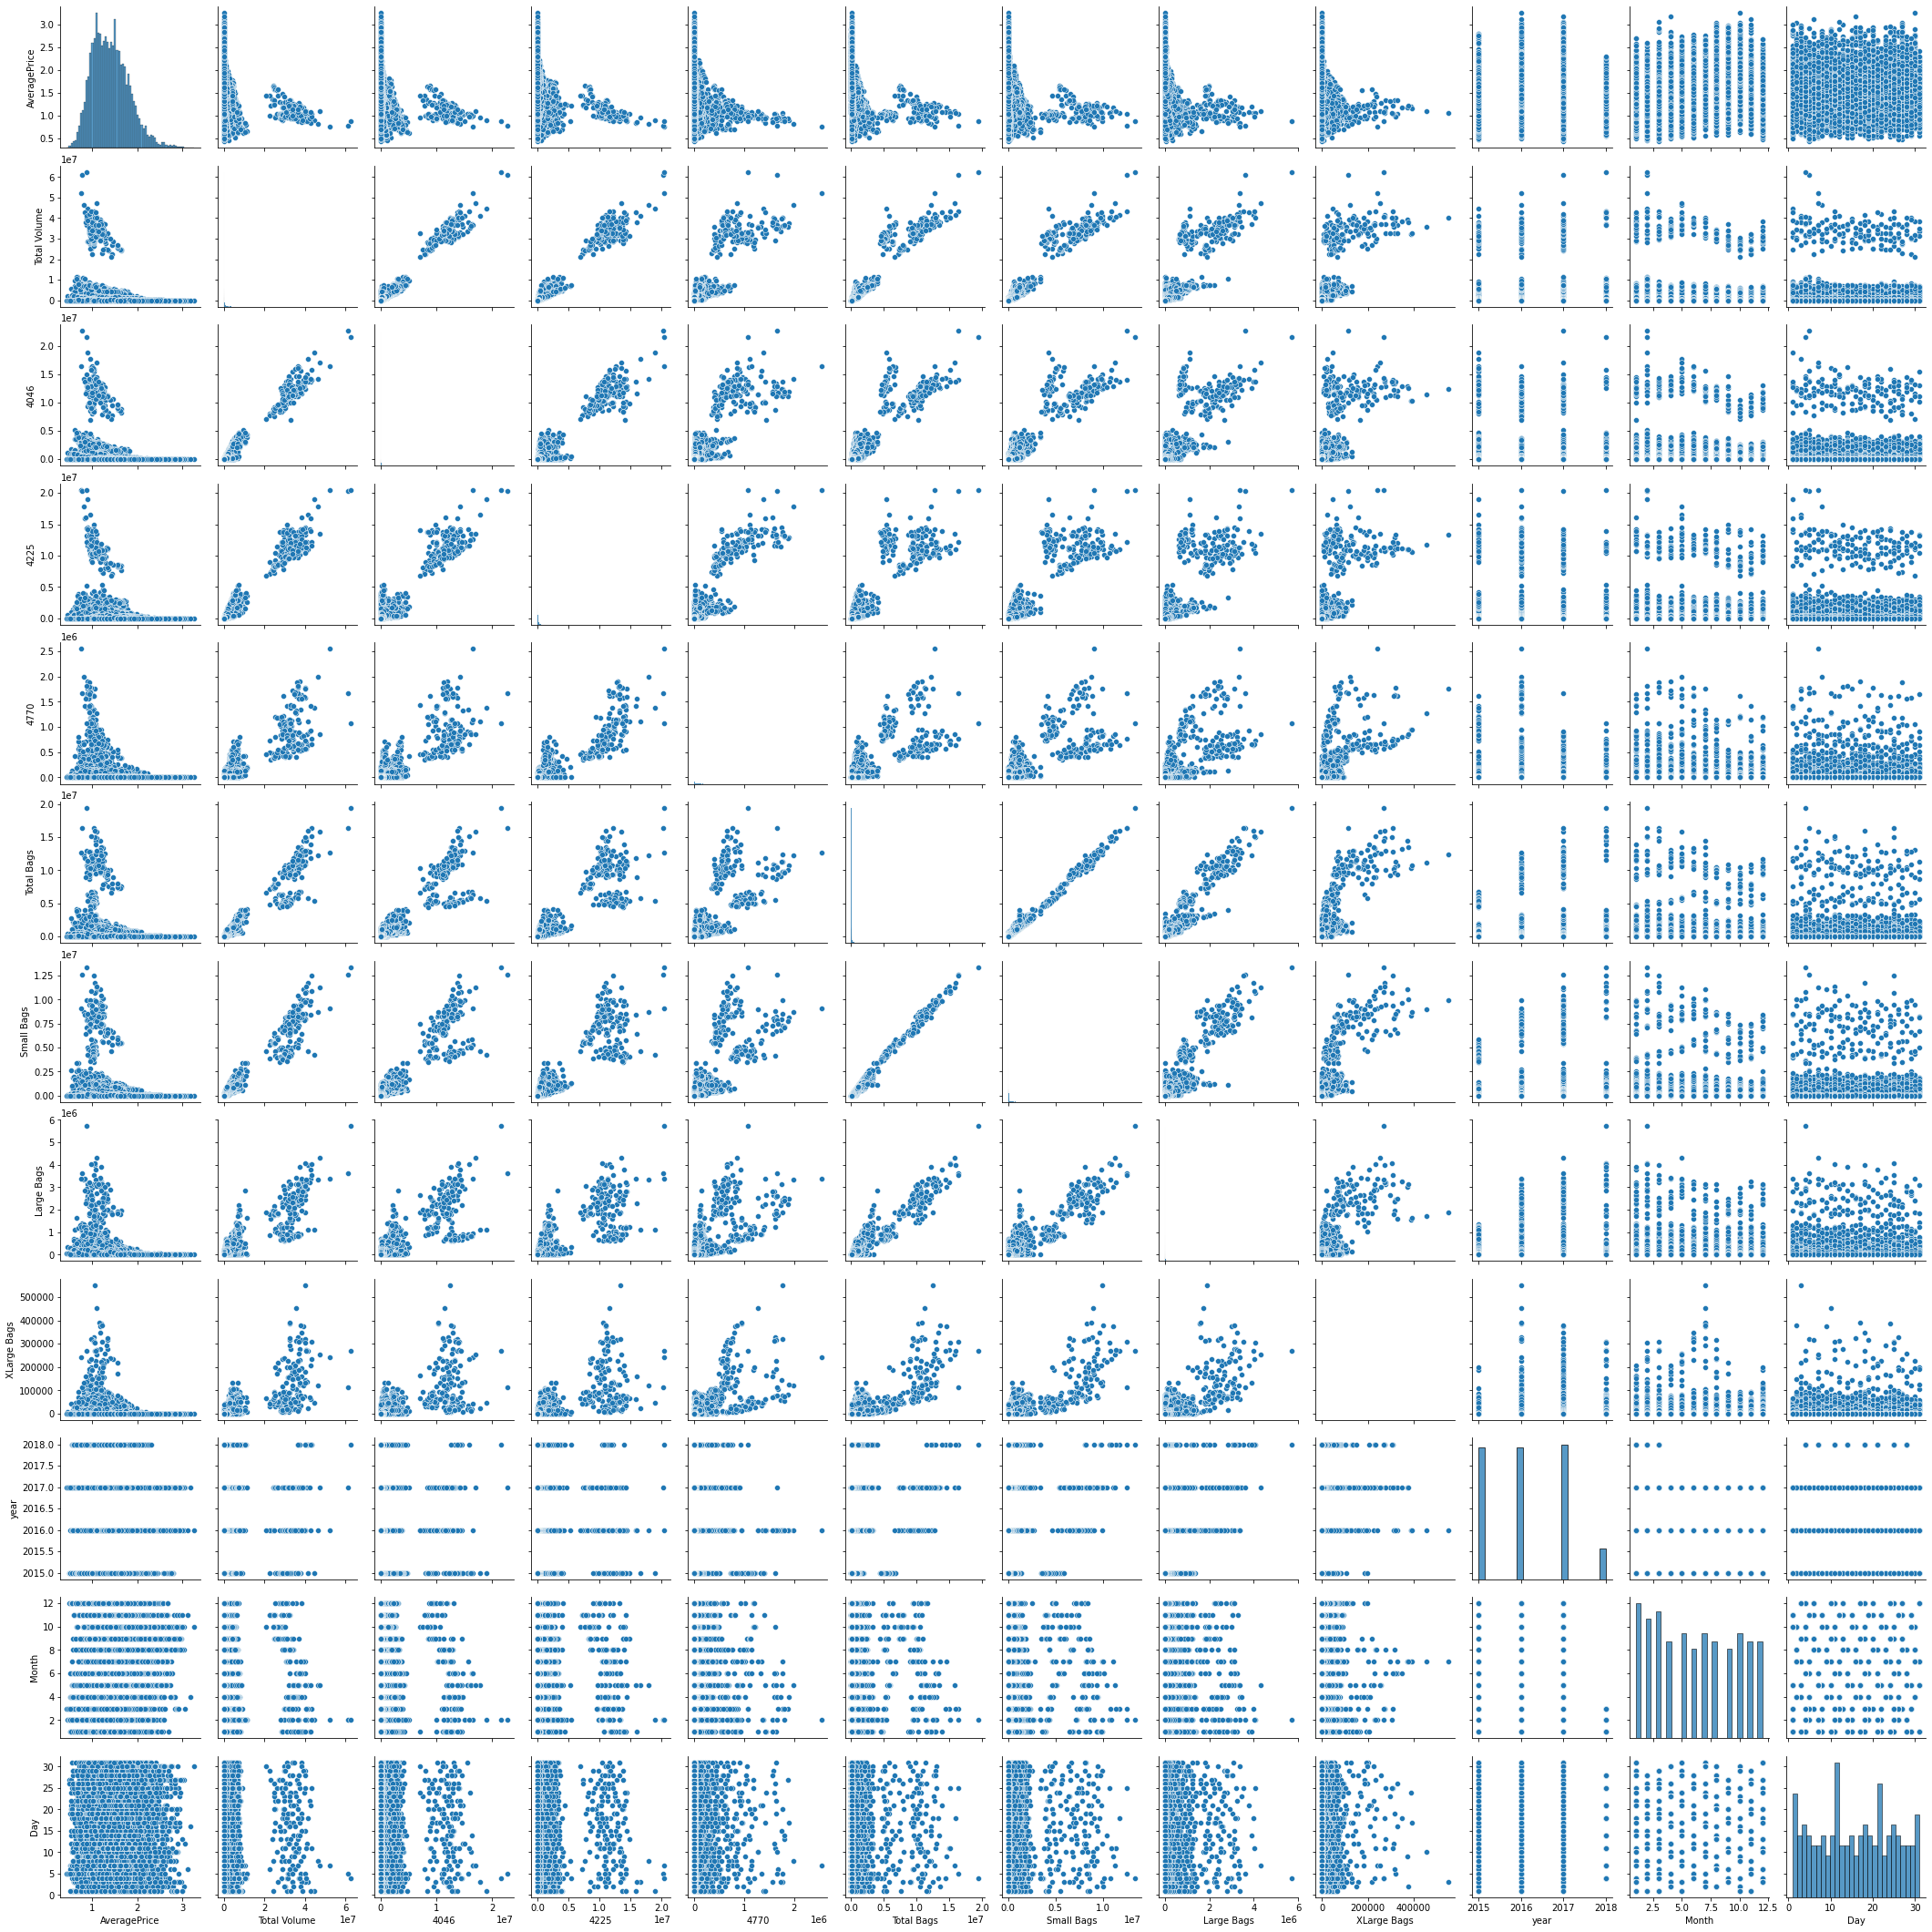

In [26]:
sns.pairplot(df)

In [10]:
# The above pair plot gives us the clear idea that target variable 'AveragePrice' are positively corelated with few feature.
# Only few columns are not correlated.

## Bar Plot

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

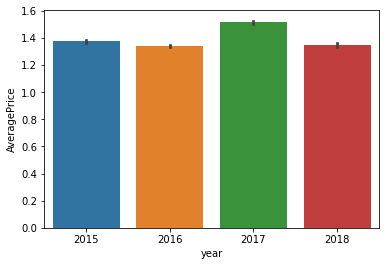

In [25]:
sns.barplot(df['year'],df['AveragePrice'])

In [11]:
# The Average Price of avacodo is highest in 2017.

## Strip Plot

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

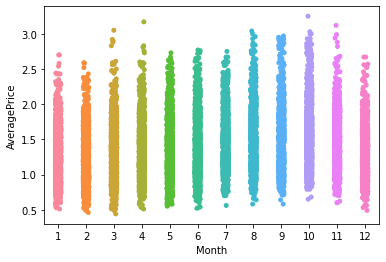

In [27]:
sns.stripplot(df['Month'],df['AveragePrice'])

In [12]:
# The Average Price of avacodo is highest in 10th month.

## Boxplot

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

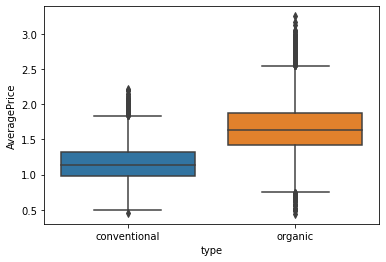

In [28]:
sns.boxplot(df['type'],df['AveragePrice'])

In [13]:
# The average price of organic avacado is higher than conventional avacado.

## Histogram Plot

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

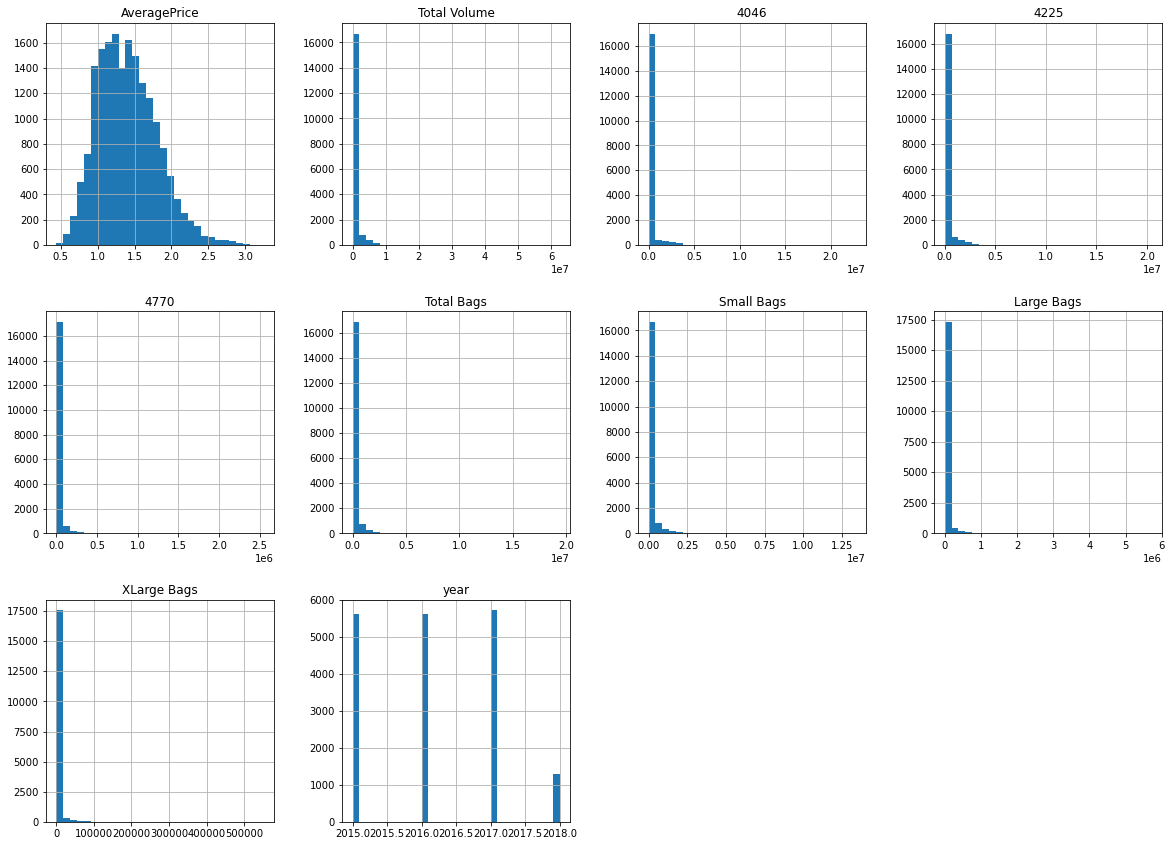

In [18]:
# ploting histogram to check the skewness

df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

In [14]:
# There are skewness in the dataset which i will remove soon.
# There are few zero values as well that also need to be taken care.

## Removing Skewness

In [19]:
q = df['AveragePrice'].quantile(0.98)
# we are removing the top 2% data from the pregnancies column

dataset_cleaned = df[df['AveragePrice']<q]
q = df['Total Volume'].quantile(0.98)
# we are removing the top 1% data from the Total Volume column

dataset_cleaned = dataset_cleaned[dataset_cleaned['Total Volume']<q]
q = dataset_cleaned['4046'].quantile(0.98)

# we are removing the top 1% data from the 4046 column
dataset_cleaned = dataset_cleaned[dataset_cleaned['4046']<q]
q = dataset_cleaned['4225'].quantile(0.98)

# we are removing the top 1% data from the 4225 column
dataset_cleaned = dataset_cleaned[dataset_cleaned['4225']<q]
q = dataset_cleaned['Total Bags'].quantile(0.98)

# we are removing the top 1% data from the Total Bags column
dataset_cleaned = dataset_cleaned[dataset_cleaned['Total Bags']<q]
q = dataset_cleaned['Small Bags'].quantile(0.98)

# we are removing the top 1% data from the Small Bags column
dataset_cleaned = dataset_cleaned[dataset_cleaned['Small Bags']<q]
q = dataset_cleaned['Large Bags'].quantile(0.98)

# we are removing the top 1% data from the Large Bags column
dataset_cleaned = dataset_cleaned[dataset_cleaned['Large Bags']<q]
q = dataset_cleaned['XLarge Bags'].quantile(0.99)

# we are removing the top 1% data from the Large Bags column
dataset_cleaned = dataset_cleaned[dataset_cleaned['XLarge Bags']<q]
q = dataset_cleaned['4770'].quantile(0.99)

# we are removing the top 1% data from the 4770 column
dataset_cleaned = dataset_cleaned[dataset_cleaned['4770']<q]

## Replacing all the zero values in different columns

In [21]:
# mean
df['AveragePrice'] = df['AveragePrice'].replace(0,df['AveragePrice'].mean())
df['Total Volume'] = df['Total Volume'].replace(0,df['Total Volume'].mean())
df['4046'] = df['4046'].replace(0,df['4046'].mean())
df['4225'] = df['4225'].replace(0,df['4225'].mean())
df['4770'] = df['4770'].replace(0,df['4770'].mean())
df['Total Bags'] = df['Total Bags'].replace(0,df['Total Bags'].mean())
df['Small Bags'] = df['Small Bags'].replace(0,df['Small Bags'].mean())
df['Large Bags'] = df['Large Bags'].replace(0,df['Large Bags'].mean())
df['XLarge Bags'] = df['XLarge Bags'].replace(0,df['XLarge Bags'].mean())

# mode
df['year'] = df['year'].replace(0,df['year'].mode()[0])
df['type'] = df['type'].replace(0,df['type'].mode()[0])
df['region'] = df['region'].replace(0,df['region'].mode()[0])

## Histogram Plot

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

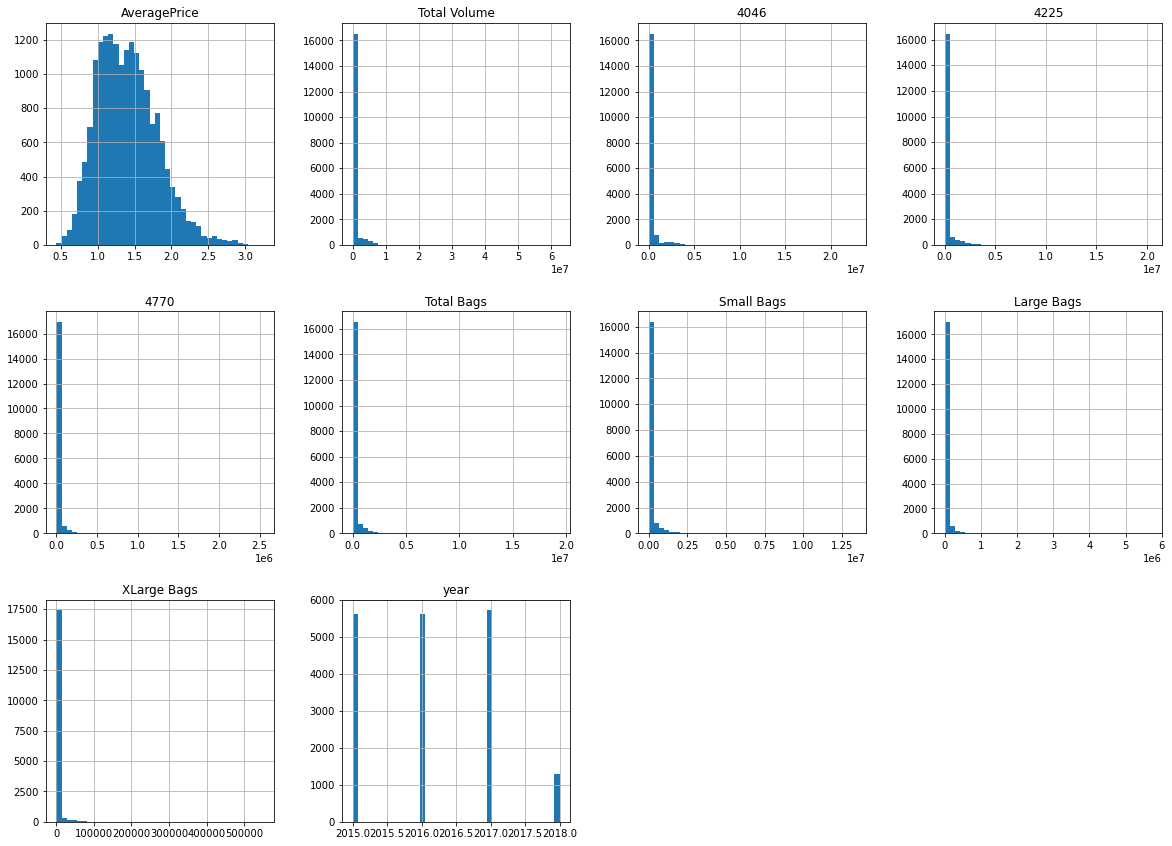

In [22]:
# ploting histogram to check the skewness

df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=40)

In [15]:
# Now from the histogram plot i can say that skewness is removed.

## Box Plot

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
year            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
dtype: object

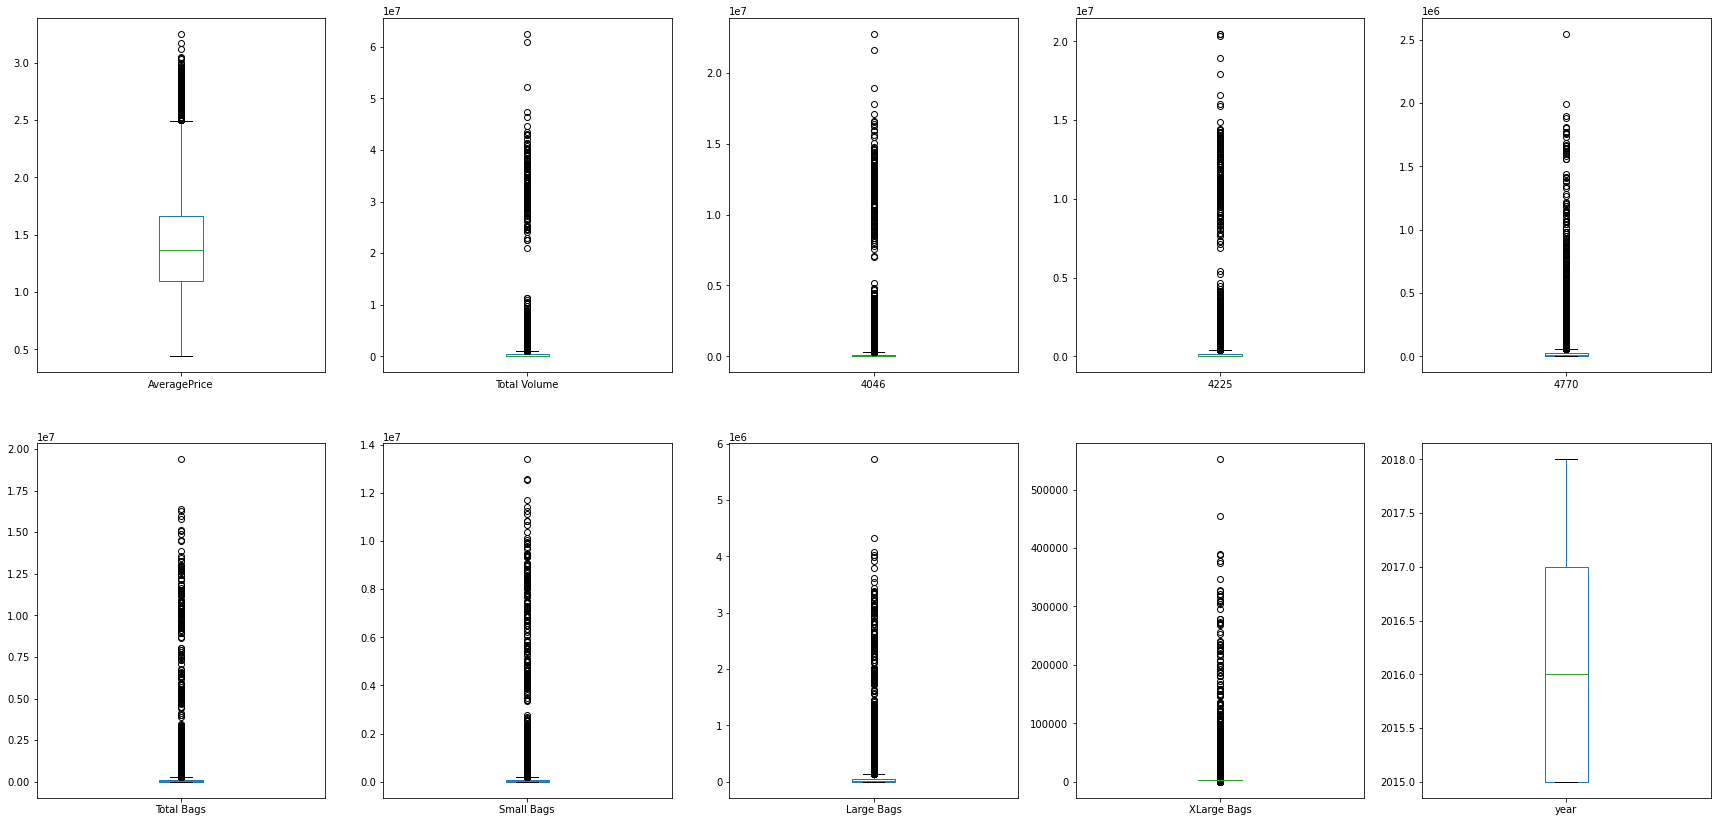

In [23]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(30,30))

In [16]:
# There are outliers in few dataset whic i will remove it from z score.

In [24]:
column = ['type','region']
le = LabelEncoder()
for i in column:
    df[i] = le.fit_transform(df[i].astype(str))

print(df.dtypes)

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object


In [17]:
# Making the categorical data into numercial for better EDA

## Z Score

In [28]:
from scipy.stats import zscore
z_score = zscore(df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)
df=df[filtering_entry]

In [29]:
df.shape

(17665, 12)

In [18]:
# After removing outliers there are 17665 rows and 12 columns in the dataset.

## Heatmap

[]

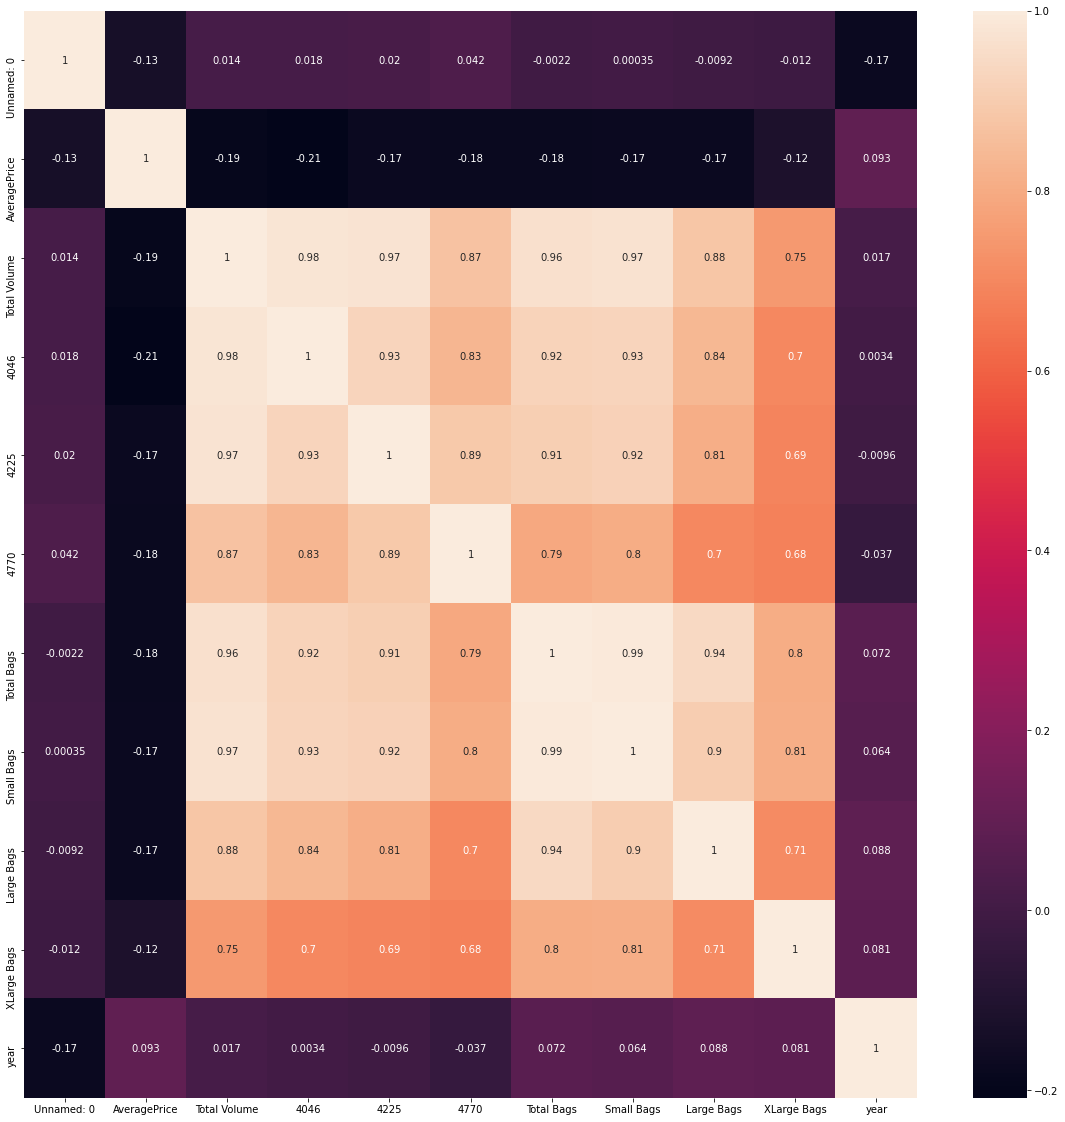

In [21]:
#checking the co-relation of all column to each other
df_cor = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_cor,annot=True)
plt.plot()

In [22]:
# XLarge Bags and Large Bags is positively correlated with each other.
# Large Bags and Total Bags is positively correlated with each other.
# small bags and 4046 is positively correlated with each other.
# smal bags and average price are negatively correlated to each other.
# Total volumes and average price are negatively correlated to each other.

## Machine Learning

In [33]:
y=df['AveragePrice']
x=df.drop(columns=['AveragePrice'])

In [23]:
# I have divided dataset into feature and label.

## Visualize the correlation

In [34]:
df.drop('AveragePrice',axis=1).corrwith(df.AveragePrice)

Total Volume   -0.332348
4046           -0.328848
4225           -0.243949
4770           -0.142565
Total Bags     -0.296826
Small Bags     -0.270862
Large Bags     -0.205638
XLarge Bags    -0.047525
type            0.613347
year            0.091384
region         -0.003307
dtype: float64

## correlation

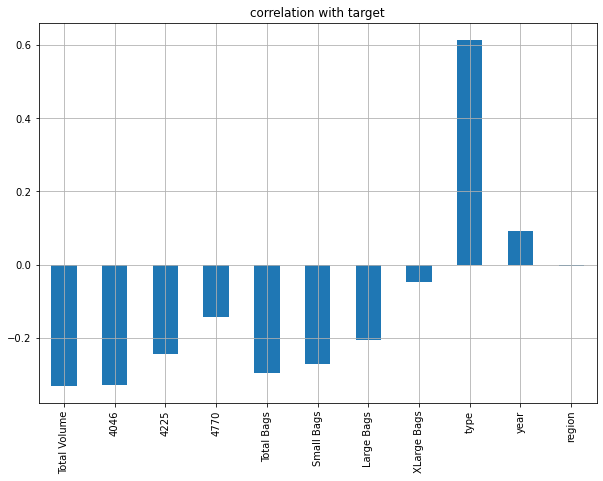

In [35]:
df.drop('AveragePrice',axis=1).corrwith(df.AveragePrice).plot(kind='bar',grid=True,figsize=(10,7),title="correlation with target")
plt.show()

In [24]:
# The above plot gives me an clear idea that few columns are positively correlated and only 2 columns are negatively correlated with label.
# However i will use all the columns for model prediction.

## Standard Scaler

In [36]:
# standard scaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.39243458, -0.35920313, -0.28219465, ..., -1.01822434,
        -1.21031372, -1.69532788],
       [-0.4016113 , -0.36002319, -0.30668693, ..., -1.01822434,
        -1.21031372, -1.69532788],
       [-0.339506  , -0.35975074, -0.14572406, ..., -1.01822434,
        -1.21031372, -1.69532788],
       ...,
       [-0.44191808, -0.35885203, -0.41194647, ...,  0.98210184,
         1.98028349,  1.74713142],
       [-0.43952728, -0.35809249, -0.41062842, ...,  0.98210184,
         1.98028349,  1.74713142],
       [-0.43826802, -0.35499935, -0.41218765, ...,  0.98210184,
         1.98028349,  1.74713142]])

In [25]:
# Standard scaler is basically scaling the date in one range so that it will be easy for Model building.

## VIF - variance inflation factor

In [37]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,654.684556,Total Volume
1,122.010383,4046
2,103.879671,4225
3,2.308473,4770
4,219.460400,Total Bags
5,109.294818,Small Bags
6,10.842518,Large Bags
7,1.630654,XLarge Bags
8,1.410631,type
9,1.128549,year


In [26]:
# VIF is used to detect the severity of multicollinearity in the ordinary least square (OLS) regression analysis.
# Multicollinearity is a phenomenon when two or more independent variables are highly intercorrelated.
# From the above stats i can say that few features are highly intercorrelated it means Multicollinearity does exist.

## Model Building

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

In [27]:
# For model prediction i am dividing the dataset into 2 parts.
# One part is used for training purpose i.e 75% dataset.
# other part is used for testing purpose i.e 25% dataset.

## Linear Regression model

In [39]:
rg = LinearRegression()
rg.fit(x_train,y_train)

LinearRegression()

In [40]:
# adjusted r2 score
rg.score(x_train,y_train)

0.42308908593397443

In [41]:
rg.score(x_test,y_test)

0.4227773071242955

In [42]:
rg.score(x_test,y_test)

0.4227773071242955

In [44]:
y_pred = rg.predict(x_test)
y_pred

array([1.54955314, 0.91380471, 1.19514727, ..., 1.28029352, 1.15995471,
       1.5489298 ])

## Scatter plot of Linear Regression

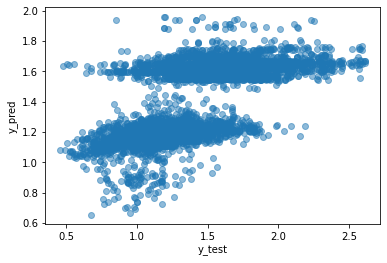

In [46]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## MSE

In [47]:
mean_squared_error(y_test,y_pred)

0.08861975063231947

## RMSE

In [48]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.2976906962474969

## R2 Score

In [49]:
r2_score(y_test,y_pred)

0.4227773071242955

In [28]:
# Linear Regression accuracy score 42%

## Random Forest Regressor Model

In [50]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [51]:
# adjusted r2 score
rf.score(x_train,y_train)

0.9766367774305948

In [52]:
rf.score(x_test,y_test)

0.840234383175313

In [53]:
y_pred = rf.predict(x_test)
y_pred

array([1.5965, 0.9496, 1.0906, ..., 1.2681, 0.9427, 1.3862])

## Scatter plot of Random Forest Regressor Model

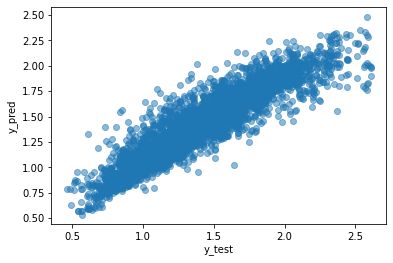

In [54]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## MSE

In [55]:
mean_squared_error(y_test,y_pred)

0.024528469336653834

## RMSE

In [58]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.15661567398141807

## R2 Score

In [59]:
r2_score(y_test,y_pred)

0.840234383175313

In [29]:
# Random Forest Regressor accuracy score 84%

## Decision Tree Regressor Model

In [60]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [61]:
dt.score(x_train,y_train)

1.0

In [62]:
dt.score(x_test,y_test)

0.6676594665032805

In [63]:
y_pred = dt.predict(x_test)
y_pred

array([1.61, 0.93, 1.14, ..., 1.42, 1.01, 1.65])

## Scatter plot of Decision Tree Regressor Model

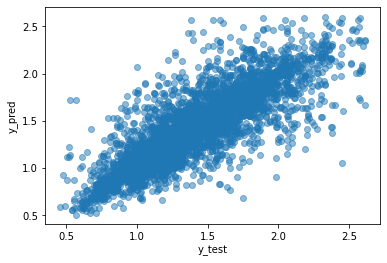

In [64]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## MSE

In [65]:
mean_squared_error(y_test,y_pred)

0.051023522752999775

## RMSE

In [66]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.22588387005937316

## R2 Score

In [67]:
r2_score(y_test,y_pred)

0.6676594665032805

In [30]:
# Decision Tree Regressor accuracy score 67%

## AdaBoost Regressor

In [68]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [69]:
# adjusted r2 score
ada.score(x_train,y_train)

0.49792673120126907

In [70]:
ada.score(x_test,y_test)

0.49992513993006915

In [71]:
y_pred = ada.predict(x_test)
y_pred

array([1.65123947, 1.03869477, 1.20885747, ..., 1.35714795, 1.21763047,
       1.61881644])

## Scatter plot of AdaBoost Regressor

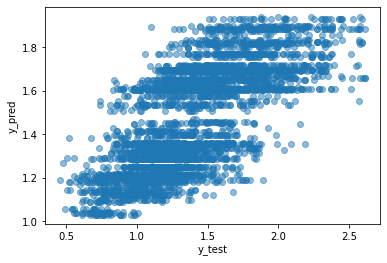

In [72]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## MSE

In [73]:
mean_squared_error(y_test,y_pred)

0.07677541084898436

## RMSE

In [74]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.2770837614314205

## R2 Score

In [75]:
r2_score(y_test,y_pred)

0.49992513993006915

In [31]:
# AdaBoost Regressor accuracy score 50%

## Hyperparameter Tuning in Random Forest Regressor Model

In [76]:
# Using RandomizedSearchCV method for improving the r2 score
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [77]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [80]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [81]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  21.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  20.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  19.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  19.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  19.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  28.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  29.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [82]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [84]:
prediction = rf_random.predict(x_test)

## Scatter Plot

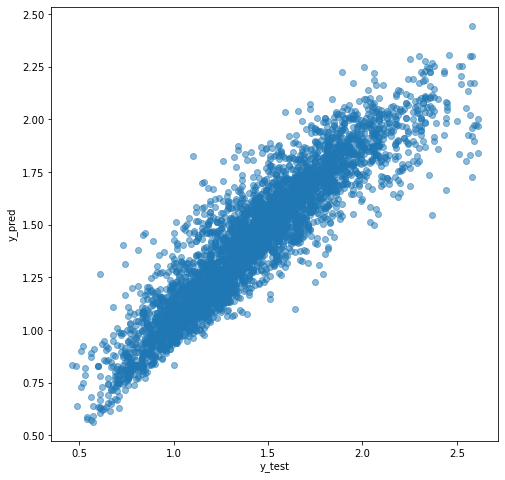

In [85]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## MSE

In [86]:
mean_squared_error(y_test,y_pred)

0.07677541084898436

## RMSE

In [87]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.2770837614314205

## R2 Score

In [88]:
r2_score(y_test,y_pred)

0.49992513993006915

In [32]:
# I have tried to improve the accuracy score for random forest regressor model but it is reducing the accuracy score.

## Regularization

In [89]:
# lasso regularization
lasscv = LassoCV(alphas = None,cv=10,max_iter=5000,normalize=True)

In [90]:
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=5000, normalize=True)

In [91]:
# best alphas parameters
alpha = lasscv.alpha_
alpha

2.0396160733637495e-06

In [92]:
# now we have best parameter lets use the lasso regularization
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.0396160733637495e-06)

In [93]:
lasso_reg.score(x_test,y_test)

0.4225445226917268

In [33]:
# I have tried to improve the accuracy score for Linear Regression with the help of lasso but it is not increasing.

## Saving the Best Model

In [94]:
import pickle

In [96]:
# saving the Random Forest Regressor Model

filename = 'finalized_model.pickle'
pickle.dump(rf,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

In [35]:
from IPython.display import Image
Image(url= "https://i.ytimg.com/vi/xD0FJns7vX0/maxresdefault.jpg")

In [34]:
# The best model is Random Forest Regressor whose accuracy score is 84%